# Pandas

In [51]:
import pandas as pd
import numpy as np

# import data from computer

In [52]:
data = pd.read_excel(r'/Users/natpi/Desktop/geo data science/Fire_data.xlsx')



In [53]:
data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [54]:
data.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

# Transform Data

 จัดการข้อมูลให้อยู่ในรูปแบบ hr:min

In [55]:
data['ACQ_TIME'] = (data['ACQ_TIME']/100).astype(str)
data['ACQ_TIME']=data['ACQ_TIME'].str.replace('.',':',regex=True)+':00'

ทำการแปลง column acq_time ให้เป็นข้อมูลประเภท datetime

In [56]:
data['ACQ_TIME'] = pd.to_timedelta(data['ACQ_TIME'])
data['DateTime']=data['ACQ_DATE']+data['ACQ_TIME']

ทำการเช็คประเภทของข้อมูล

In [58]:
data.dtypes

OBJECTID                int64
LATITUDE              float64
LONGITUDE             float64
BRIGHT_TI4            float64
SCAN                  float64
TRACK                 float64
ACQ_DATE       datetime64[ns]
ACQ_TIME      timedelta64[ns]
SATELLITE              object
INSTRUMENT             object
CONFIDENCE             object
VERSION                 int64
BRIGHT_TI5            float64
FRP                   float64
TYPE                    int64
DateTime       datetime64[ns]
dtype: object

แสดงข้อมูล 5 วัน 

In [68]:
data2=data[data['DateTime'] <= (data['DateTime'].iloc[0] + pd.Timedelta(days=5))]

In [69]:
data2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,07:01:00,N,VIIRS,n,1,298.2,2.9,0,2019-12-05 07:01:00
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,07:01:00,N,VIIRS,n,1,299.0,5.4,0,2019-12-05 07:01:00
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,284.8,0.3,0,2019-12-05 19:31:00
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,285.5,1.1,0,2019-12-05 19:31:00


# Plot

หาผลต่างขอเวลา(min)

In [80]:
data['delta']=data['DateTime']-data['DateTime'].iloc[0]
data['delmin']=(data['delta'].dt.total_seconds())/60

In [81]:
data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,20:03:00,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0


In [85]:
data2 = data[data['DateTime'] <= (data['DateTime'].iloc[0] + pd.Timedelta(days=5))]
data2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DateTime,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,06:35:00,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,07:01:00,N,VIIRS,n,1,298.2,2.9,0,2019-12-05 07:01:00,4 days 00:26:00,5786.0
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,07:01:00,N,VIIRS,n,1,299.0,5.4,0,2019-12-05 07:01:00,4 days 00:26:00,5786.0
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,284.8,0.3,0,2019-12-05 19:31:00,4 days 12:56:00,6536.0
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,19:31:00,N,VIIRS,n,1,285.5,1.1,0,2019-12-05 19:31:00,4 days 12:56:00,6536.0


In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt

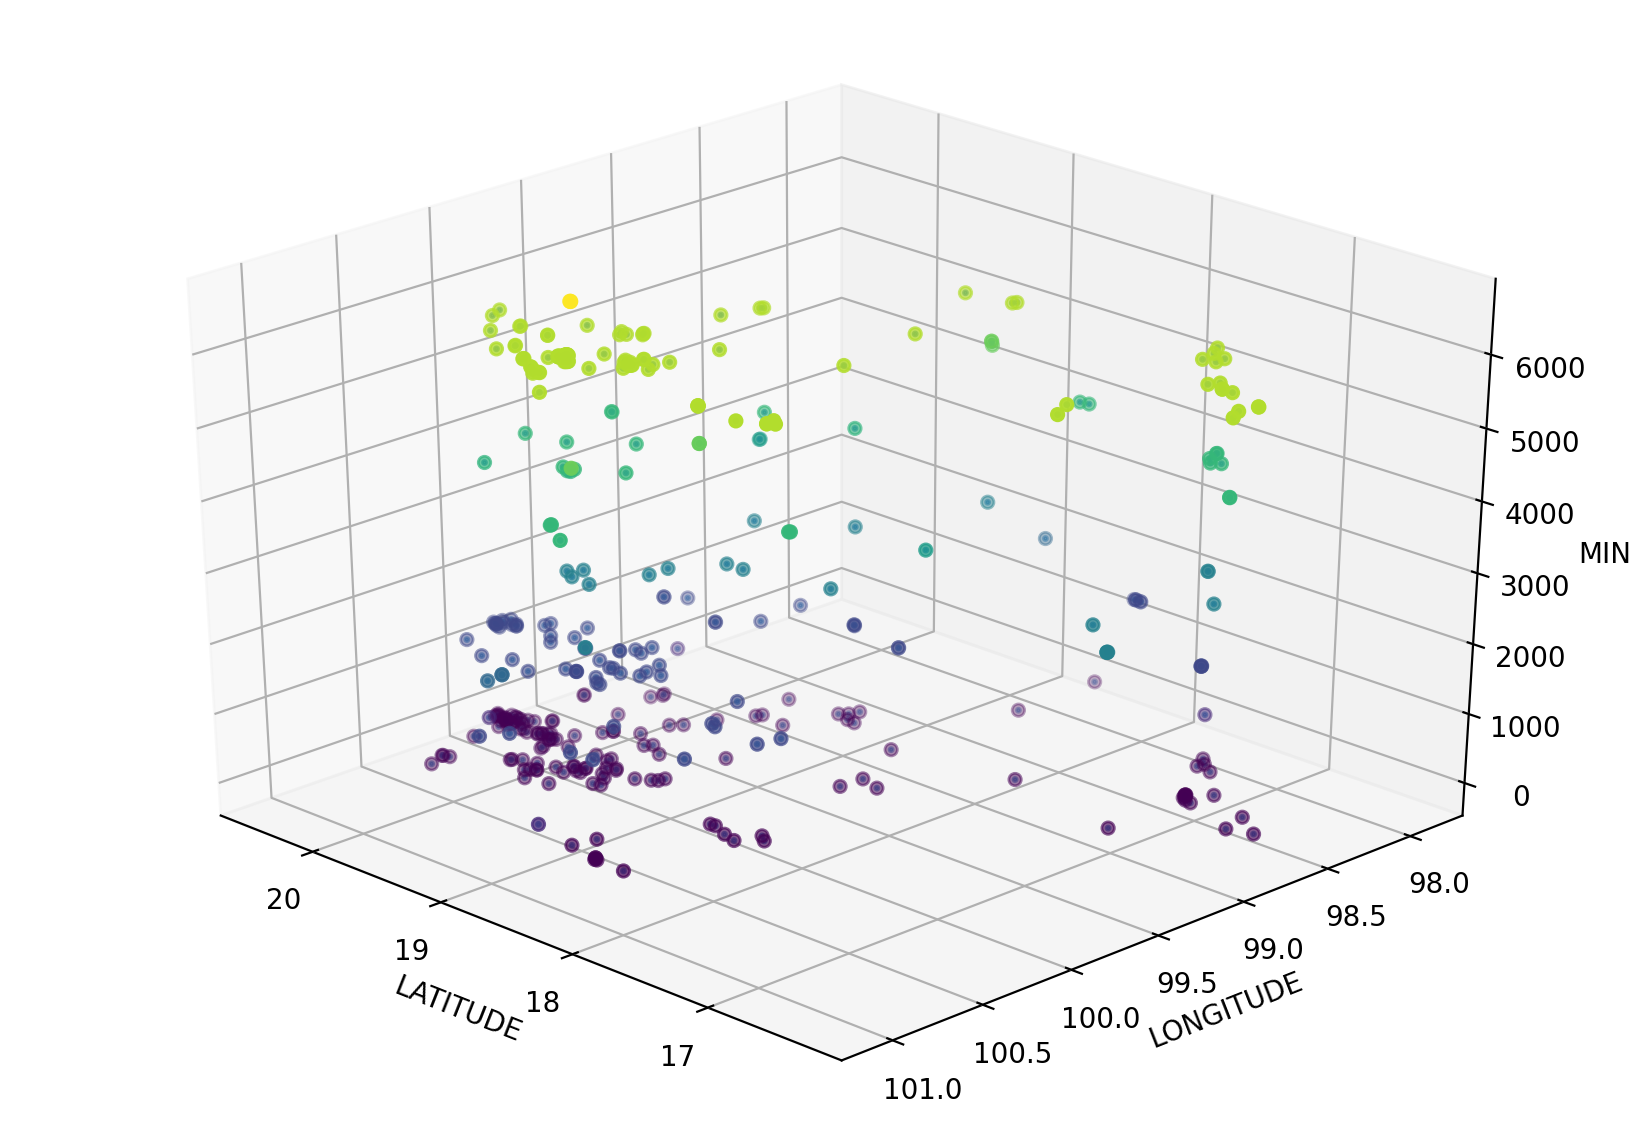

In [86]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=200

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
x=data2['LATITUDE']
y=data2['LONGITUDE']
z=data2['delmin']
ax.scatter(x,y,z,s=2)
ax.view_init(azim=135)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('MIN')
pnt3d=ax.scatter(x,y,z,c=z)

plt.show()